# Sampling in Python

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

<hr>

## Chapter 1: Introduction to Sampling

### Sampling and point estimates

- Working with a subset of the whole population is called **sampling**
- The population is the complete dataset
- Typically, we don't know what the whole population is 
- The sample is the subset of data you calculate on

In [13]:
coffee = pd.read_feather("databases/coffee_ratings_full.feather")
coffee[["total_cup_points", "variety", "country_of_origin", "aroma", "flavor", "aftertaste", "body", "balance"]].head()

,total_cup_points,variety,country_of_origin,aroma,flavor,aftertaste,body,balance
0,90.58,None,Ethiopia,8.67,8.83,8.67,8.50,8.42
1,89.92,Other,Ethiopia,8.75,8.67,8.50,8.42,8.42
2,89.75,Bourbon,Guatemala,8.42,8.50,8.42,8.33,8.42
3,89.00,None,Ethiopia,8.17,8.58,8.42,8.50,8.25
4,88.83,Other,Ethiopia,8.25,8.50,8.25,8.42,8.33


Points vs. flavor: population

In [21]:
pts_vs_flavor_pop = coffee[["total_cup_points", "flavor"]].sample(n=10) #returns 10 random rows
pts_vs_flavor_pop

,total_cup_points,flavor
1082,80.42,7.08
780,82.08,7.25
837,81.83,7.50
749,82.25,7.33
1085,80.42,7.08
165,84.50,7.83
301,83.75,7.67
1161,79.67,7.25
547,82.92,7.83
1124,80.00,7.75


`.sample()` method works for both pandas DataFrames and Series

In [19]:
cup_points_samp = coffee["total_cup_points"].sample(n=10)
cup_points_samp

811     82.00
1198    79.00
1062    80.58
246     84.00
30      86.58
560     82.83
1134    79.92
583     82.75
174     84.42
1242    78.00
Name: total_cup_points, dtype: float64

A *population parameter* is a calculation made on the population dataset

In [26]:
np.mean(pts_vs_flavor_pop["total_cup_points"])

81.784

A *point estimate* or *sample statistic* is a calculation made on the sample dataset

In [22]:
np.mean(cup_points_samp)

82.00800000000001

**Point estimates with pandas**

In [25]:
print(pts_vs_flavor_pop["total_cup_points"].mean())
print(cup_points_samp.mean())

81.784
82.00800000000001


Task 1

In [30]:
spotify_population = pd.read_feather("databases/spotify_2000_2020.feather")

# Sample 1000 rows from spotify_population
spotify_sample = spotify_population.sample(n=1000)

# Calculate the mean duration in mins from spotify_population
mean_dur_pop = spotify_population["duration_minutes"].mean()

# Calculate the mean duration in mins from spotify_sample
mean_dur_samp = spotify_sample["duration_minutes"].mean()

# Print the means
print(mean_dur_pop)
print(mean_dur_samp)

3.8521519140900073
3.8921634333333333


Task 2

In [31]:
# Create a pandas Series from the loudness column of spotify_population
loudness_pop = spotify_population['loudness']

# Sample 100 values of loudness_pop
loudness_samp = loudness_pop.sample(n=100)

# Calculate the mean of loudness_pop
mean_loudness_pop = np.mean(loudness_pop)

# Calculate the mean of loudness_samp
mean_loudness_samp = np.mean(loudness_samp)

print(mean_loudness_pop)
print(mean_loudness_samp)

-7.366856851353947
-6.74969


### Convenience sampling

- Collecting data by the easiest method is called - convenience sampling
- It often leads to sample being not representative, causing sample bias

In [32]:
coffee_ratings_first10 = coffee.head(10)
coffee_ratings_first10["total_cup_points"].mean()

#Convenience sample is not representative, the actual mean is around 82

89.1

**Visualizing selection bias**

*Population:*

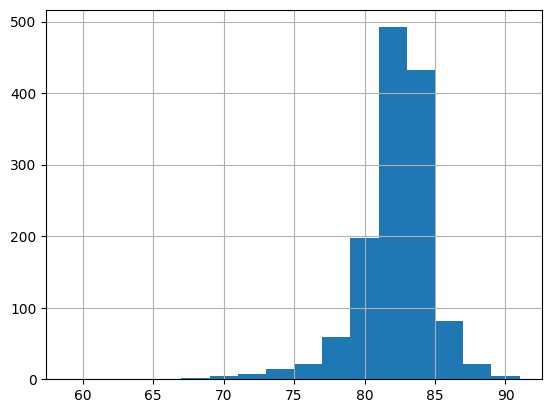

In [33]:
coffee["total_cup_points"].hist(bins=np.arange(59, 93, 2))
plt.show()

*The same code for convenience sample:*

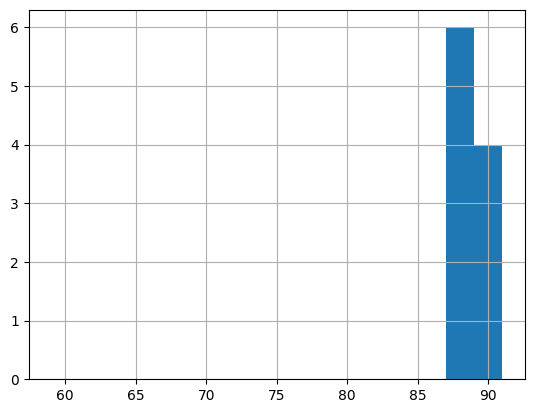

In [34]:
coffee_ratings_first10["total_cup_points"].hist(bins=np.arange(59, 93, 2))
plt.show()

Comparing two histograms it is clear that the distribution of a sample value is not the same as the sample plot

*Visualizing seelcction bias for a random selection:*

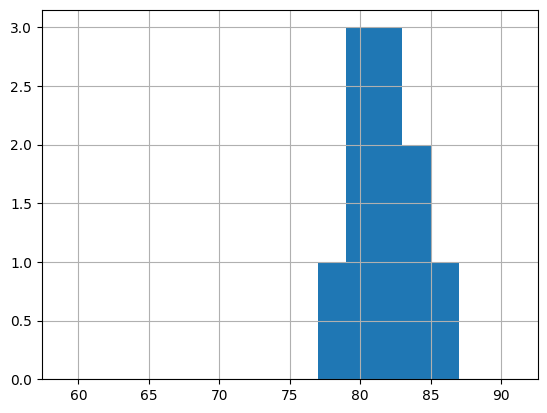

In [36]:
cup_points_samp.hist(bins=np.arange(59, 93, 2))
plt.show()

The shape of the distribution is closer to the actual population when random sampling is used

### Pseudo-random number generation

- appears to be random, but actually next "random" number is calculated from previous "random" number
- the first "random" number calculated from a seed
- The same seed value yields the same random numbers

Visualizing "random" numbers

In [37]:
randoms = np.random.beta(a=2, b=2, size=5000)
randoms

#size - how many numbers to generate

array([0.57716901, 0.16391923, 0.58169851, ..., 0.47082744, 0.28434413,
       0.24829481])

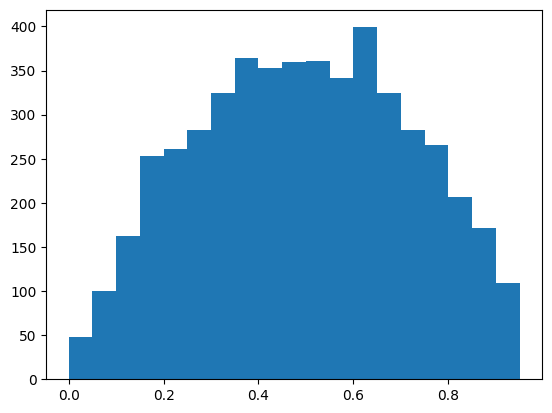

In [38]:
plt.hist(randoms, bins = np.arange(0, 1, 0.05))
plt.show()

In [39]:
np.random.seed(200000229)

In [40]:
np.random.normal(loc=2, scale=1.5, size=2)

#loc - mean
#scale - std

array([2.69861022, 5.48501273])

<hr>

## Chapter 2: Sampling Methods

<hr>

## Chapter 3: Sampling Distributions

<hr>

## Chapter 4: Bootstrap Distributions